In [1]:
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pickle
import pandas as pd

/home/robert/miniconda3/envs/dmt_expedia/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/robert/miniconda3/envs/dmt_expedia/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/robert/miniconda3/envs/dmt_expedia/lib/python3.11/site-p

In [2]:
# Load the saved model
with open('models/lgbm_ranker_best2_model.pkl', 'rb') as f:
    ranker_model = pickle.load(f)
    
df_test = pd.read_csv('data/final_features_test.csv.zip', index_col=0)

In [3]:
PREDICTOR_COLS = [c for c in df_test.columns if c not in ['srch_id', 'prop_id', 'prop_srch_dest_id', 'relevance_score', 'target_cls']]
X_test = df_test[PREDICTOR_COLS]

In [4]:
# Use TreeExplainer to get SHAP values
explainer = shap.TreeExplainer(ranker_model)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


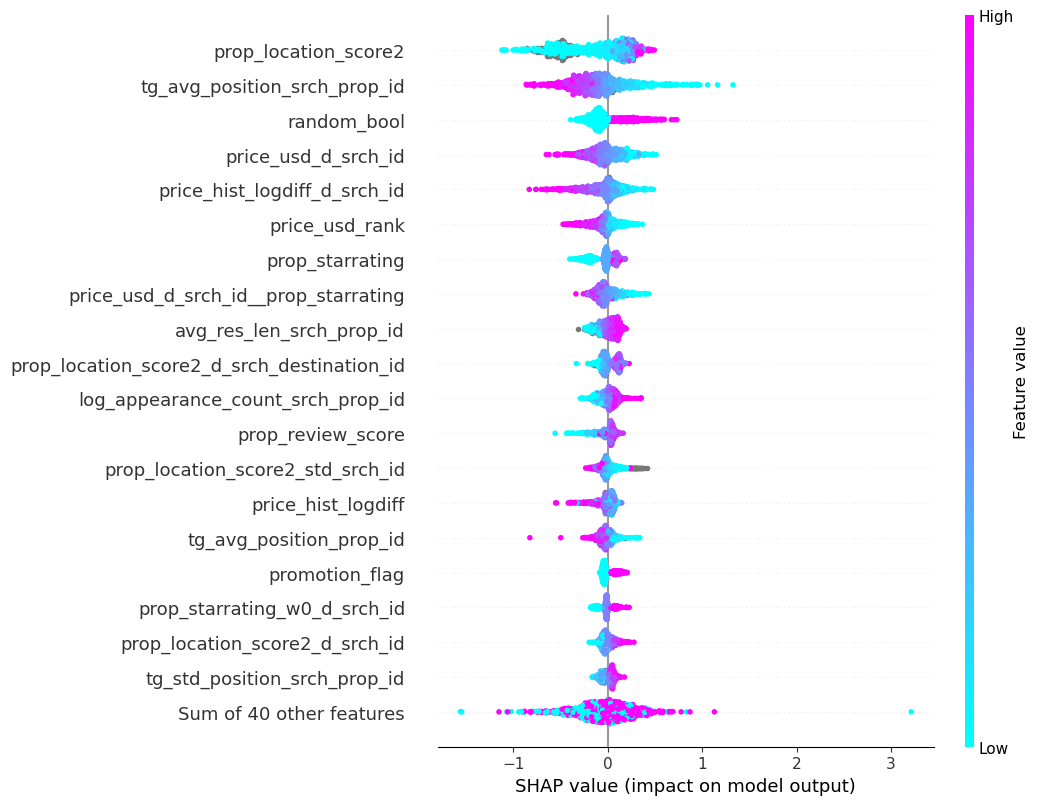

In [51]:
# Make a SHAP beehive plot
values = explainer(shap.sample(X_test, nsamples=1000, random_state=0))
fig, ax = plt.subplots()
shap.plots.beeswarm(
    values,
    color=plt.get_cmap("cool"),
    max_display=20,
)
fig.savefig('figures/shap_beeswarm_plot.pdf', format='pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

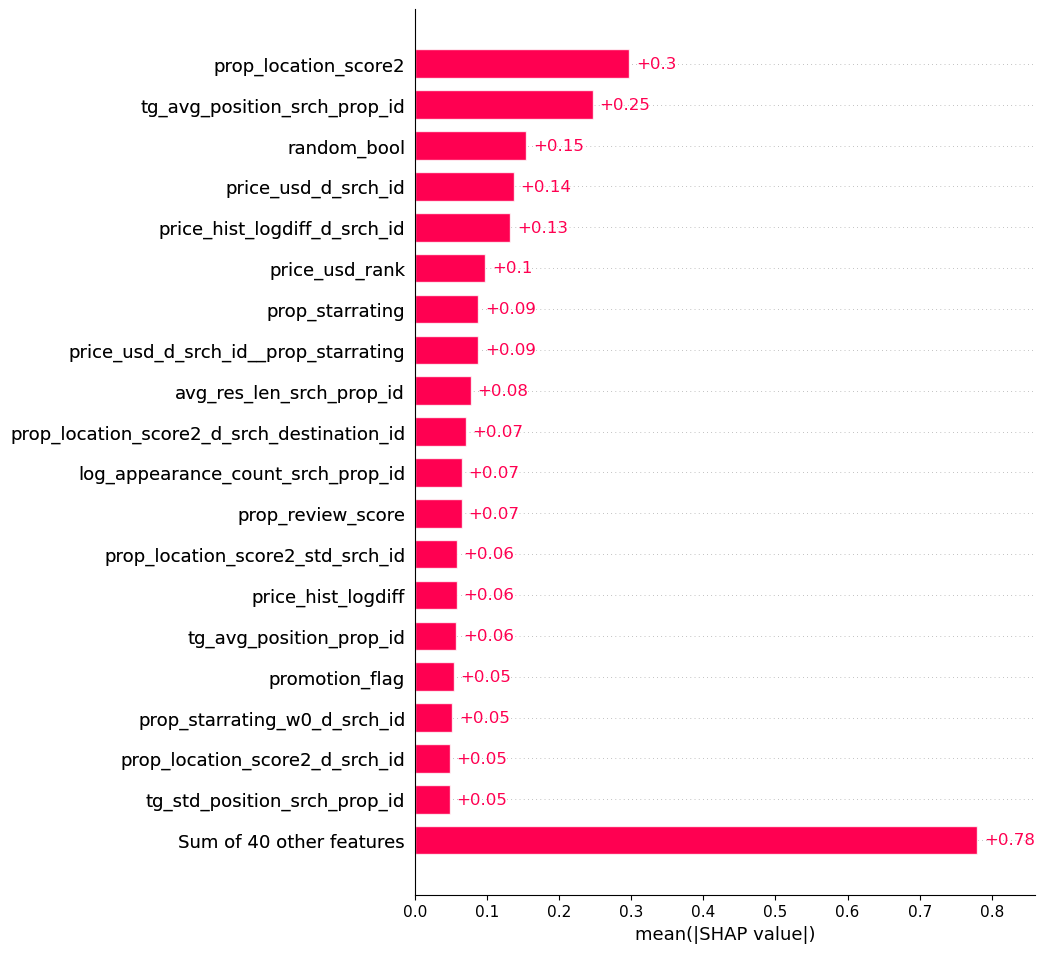

In [48]:
fig, ax = plt.subplots()
shap.plots.bar(values.abs.mean(0), max_display=20)
fig.savefig('figures/shap_bars.pdf', format='pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

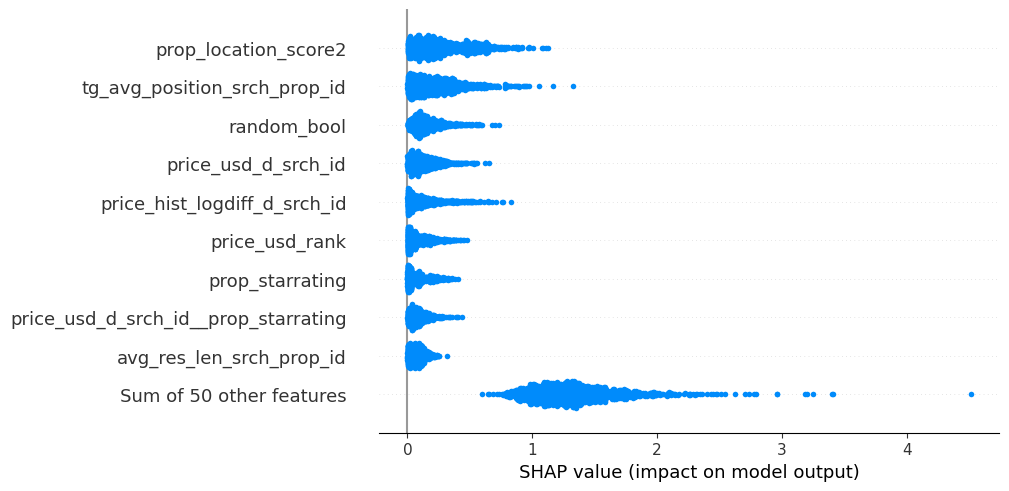

In [21]:
shap.plots.beeswarm(values.abs, color="shap_blue")

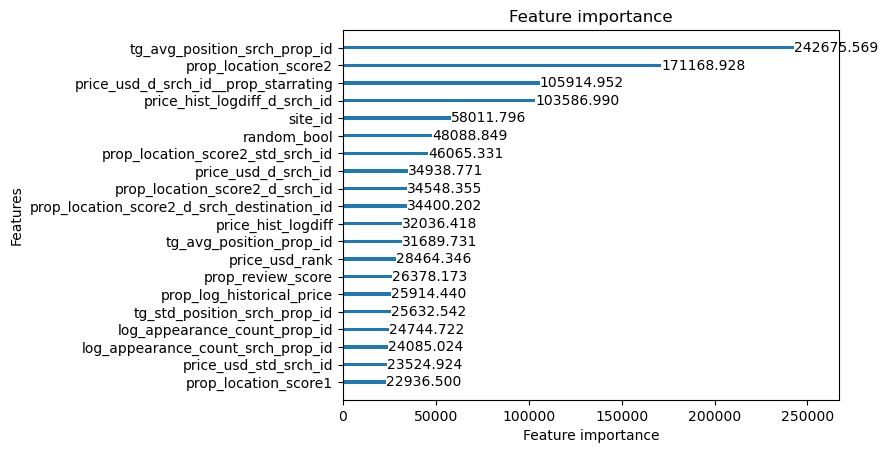

In [43]:
# Feature split importance plot
fig, ax = plt.subplots()
lgb.plot_importance(ranker_model, importance_type='gain', grid=False, max_num_features=20, ax=ax)
fig.savefig('figures/ranker_feature_importance_gain.pdf', format='pdf', bbox_inches='tight')

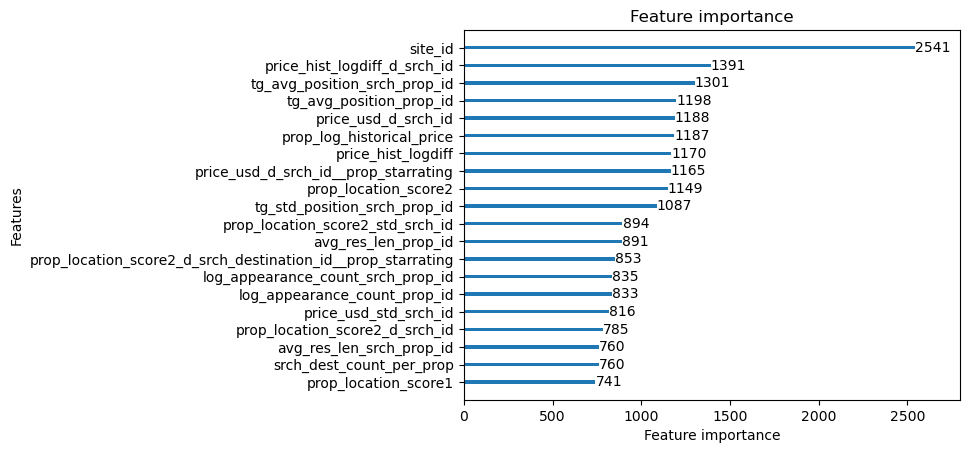

In [44]:
fig, ax = plt.subplots()
lgb.plot_importance(ranker_model, importance_type='split', grid=False, max_num_features=20, ax=ax)
fig.savefig('figures/ranker_feature_importance_splits.pdf', format='pdf', bbox_inches='tight')